# Task1 

In [7]:
import pandas
# read the train and test set
train = pandas.read_csv('adult_train.csv')
test = pandas.read_csv('adult_test.csv')

# split into x and y
x_train = train.drop(columns=['target'])
y_train = train['target']
x_test = test.drop(columns=['target'])
y_test = test['target']

# number encoding (step 2)
from sklearn.feature_extraction import DictVectorizer

dictsTrain = x_train.to_dict(orient='records')
dictsTest = x_test.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
x_train_enc = dv.fit_transform(dictsTrain)
x_test_enc = dv.transform(dictsTest)

In [8]:
# step 3 use a pipeline instead of manually encoding the data
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
   
    DictVectorizer(sparse=False),
    StandardScaler(),
    RandomForestClassifier(n_estimators=90, max_depth=9, random_state=69)
)
# make sure the pipeline is working
pipeline.fit(x_train.to_dict(orient='records'), y_train)
y_pred = pipeline.predict(x_test.to_dict(orient='records'))
from sklearn.metrics import accuracy_score
print('accuracy:', accuracy_score(y_test, y_pred))

accuracy: 0.8554757078803513


# Task 2

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import zero_one_loss
from sklearn.preprocessing import StandardScaler

def plot_evaluation(Xtrain, Ytrain, Xtest, Ytest, max_depth_range):
    train_scores = []
    test_scores = []

    # loop over all depths
    for depth in max_depth_range:
        # train the TreeRegressor (arbitrary variance) 
        pipeline = make_pipeline(
            DictVectorizer(sparse=False),
            StandardScaler(),
            DecisionTreeClassifier(max_depth=depth, random_state=69)
            
        )
        pipeline.fit(Xtrain.to_dict(orient='records'), Ytrain)
        # predict on train and test set
        Ytrain_pred = pipeline.predict(Xtrain.to_dict(orient='records'))
        Ytest_pred = pipeline.predict(Xtest.to_dict(orient='records'))

        # compute the scores
        train_scores.append(zero_one_loss(Ytrain, Ytrain_pred))
        test_scores.append(zero_one_loss(Ytest, Ytest_pred))

    # plot
    plt.figure(figsize=(10, 6))
    plt.plot(max_depth_range, train_scores, label='Training ', marker='o')
    plt.plot(max_depth_range, test_scores, label='Test ', marker='o')
    plt.xlabel('Max Depth')
    plt.ylabel('Error')
    plt.title('Evaluation Scores for Different Max Depths')
    plt.legend()
    plt.grid()
    plt.show()

max_depth_max = range(1, 16)

# Call the function to plot the evaluation scores
plot_evaluation(x_train, y_train, x_test, y_test, max_depth_max)

A similar look to our own tree was formed however the optimal depth was higher (migh be due to data). The test and train losses deviate at higher depths

evaluating with 1 estimators


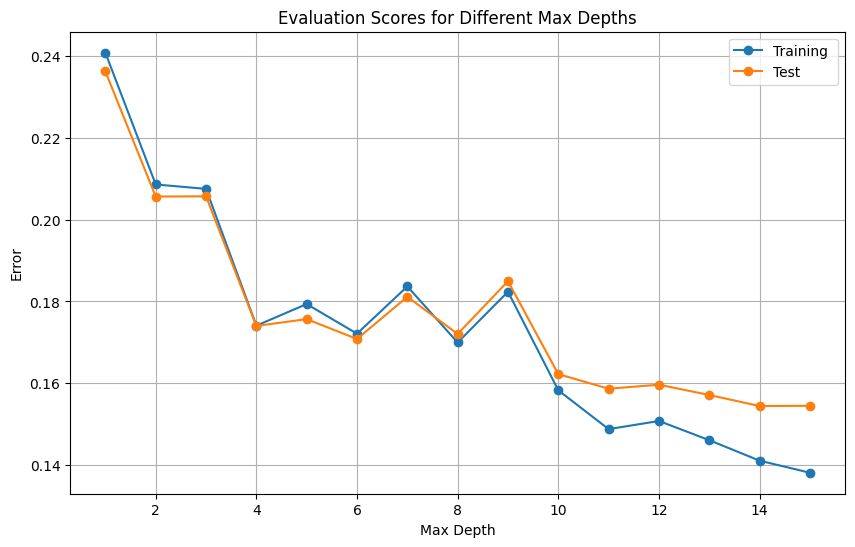

evaluating with 10 estimators


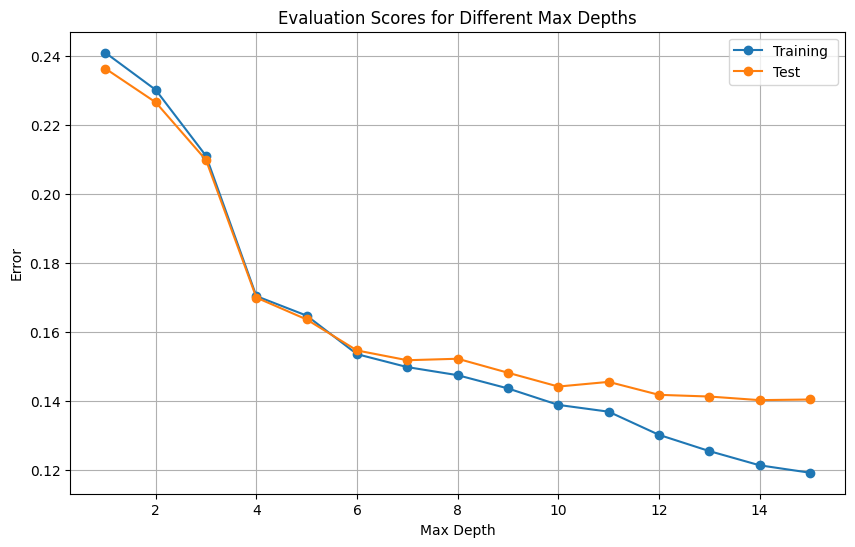

evaluating with 50 estimators


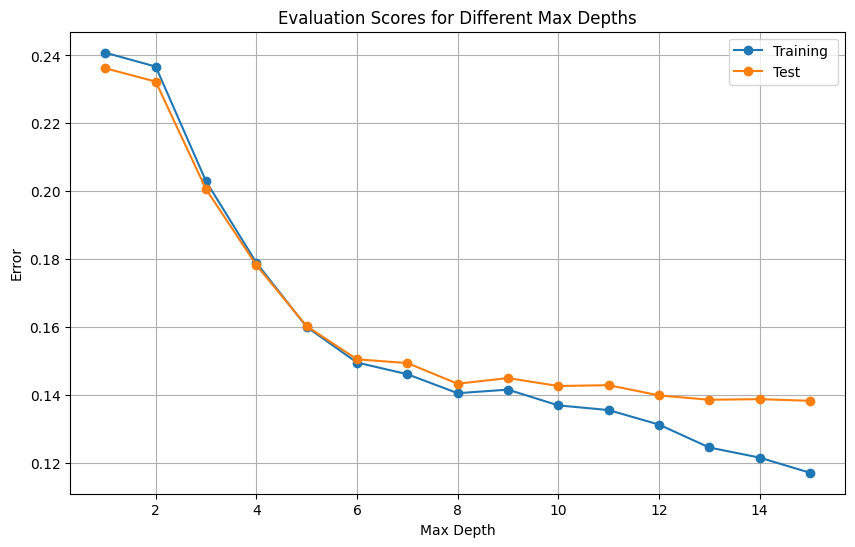

evaluating with 150 estimators


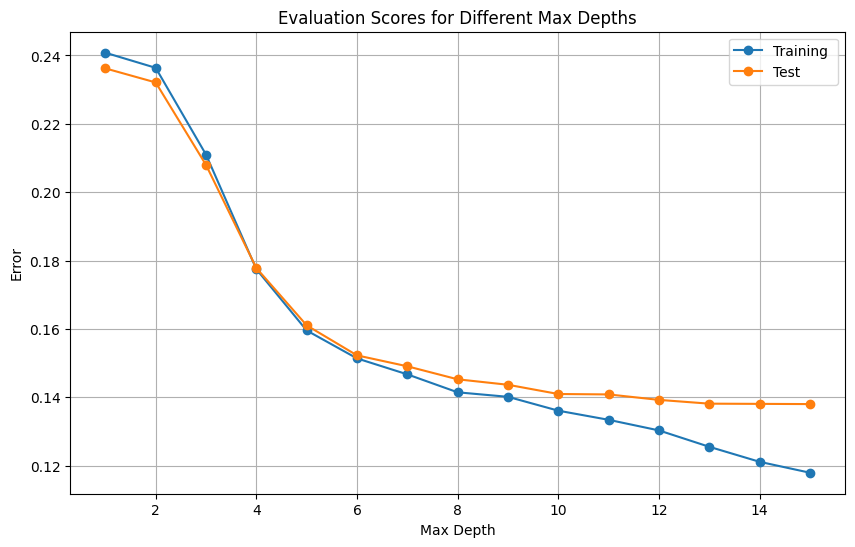

evaluating with 200 estimators


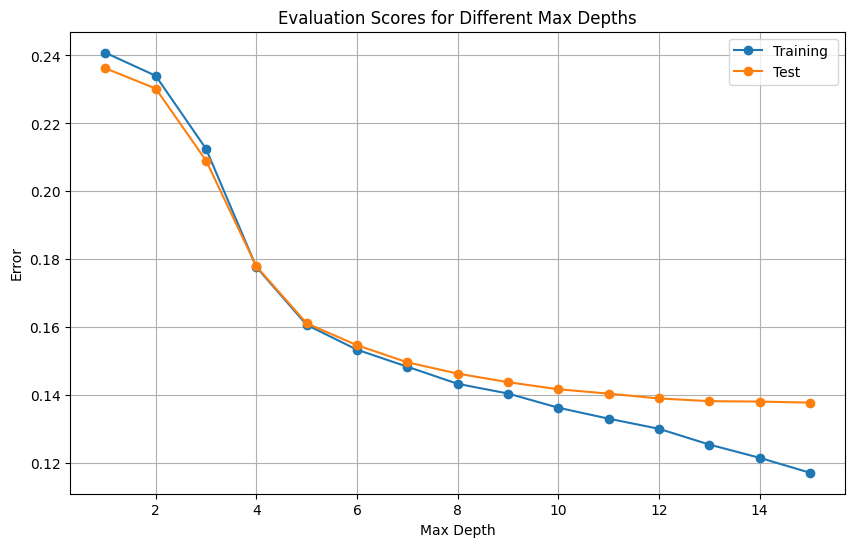

evaluating with 300 estimators


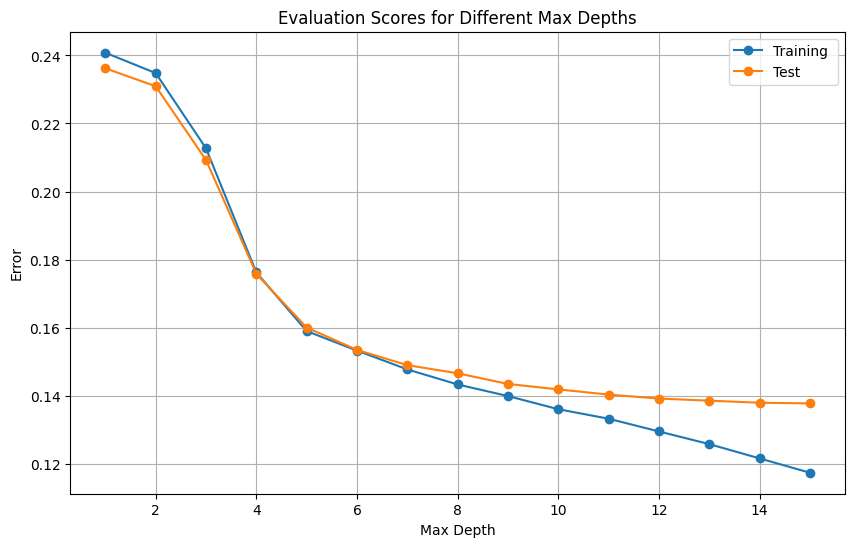

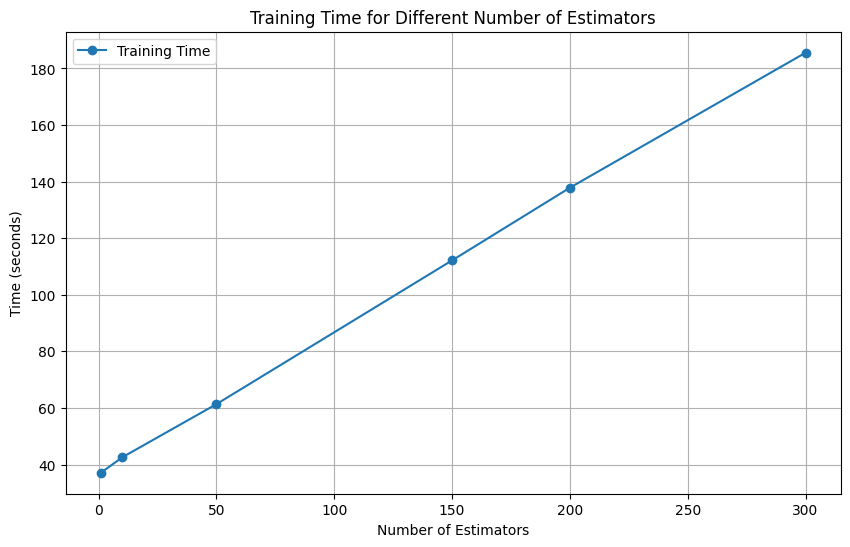

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import zero_one_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

def plot_evaluation_ne(Xtrain, Ytrain, Xtest, Ytest, max_depth_range, NE):
    train_scores = []
    test_scores = []

    # loop over all depths
    for depth in max_depth_range:
        # train the TreeRegressor (arbitrary variance) 
        pipeline = make_pipeline(
            DictVectorizer(sparse=False),
            StandardScaler(),
            RandomForestClassifier(max_depth=depth, n_estimators=NE, random_state=69, n_jobs=1)
           
        )
        pipeline.fit(Xtrain.to_dict(orient='records'), Ytrain)
        # predict on train and test set
        Ytrain_pred = pipeline.predict(Xtrain.to_dict(orient='records'))
        Ytest_pred = pipeline.predict(Xtest.to_dict(orient='records'))

        # compute the scores
        train_scores.append(zero_one_loss(Ytrain, Ytrain_pred))
        test_scores.append(zero_one_loss(Ytest, Ytest_pred))

    # plot
    plt.figure(figsize=(10, 6))
    plt.plot(max_depth_range, train_scores, label='Training ', marker='o')
    plt.plot(max_depth_range, test_scores, label='Test ', marker='o')
    plt.xlabel('Max Depth')
    plt.ylabel('Error')
    plt.title('Evaluation Scores for Different Max Depths')
    plt.legend()
    plt.grid()
    plt.show()

max_depth_max = range(1, 16)
ne_range = [1, 10, 50, 150, 200 , 300]

# Call the function to plot the evaluation scores
import time
import numpy as np
training_times = np.zeros(len(ne_range))
for NE in ne_range:
    start = time.time()
    print(f"evaluating with {NE} estimators")
    plot_evaluation_ne(x_train, y_train, x_test, y_test, max_depth_max, NE)
    end = time.time()
    training_times[ne_range.index(NE)] = end - start

plt.figure(figsize=(10, 6))
plt.plot(ne_range, training_times, label='Training Time', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Time (seconds)')
plt.title('Training Time for Different Number of Estimators')
plt.legend()
plt.grid()
plt.show()





## whats the difference between the descision tree and random forest with enseble size of 1
- The descision tree plot deviates at around a max depth of 6 whereas the random forest plot deviates at 10. The random forest plot is also much more jagged
This is because the one tree in the random fores is still trained on a random subset of the data meaning it is less likely to overfit. You can clearly see the randomness by just looking at how the different depths perform in such a jagged way.

## what happens with the curve
- the curve becomes more smooth as the ensemble size increases. This is due to the likelyhood of overfitting decreasing as the training data is splayed randomly over more trees. If one was to run the experient again with the smaller size it might over or underperform at any depth.  As the ensemble size grows it will be more likely to be good until some depth (up to a point of course)

## what happens with the best observed test set as the ensemble grows?
- the error decreases:) up until about 200 trees.

## what happens with the training time as the ensemble grows?
The training time increases. This is because the model is being trained on more trees
it looks to be a linear increase in time with the number of trees. This might be because the trees are trained independently.